# Health care Daata review

In [1]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import words


### Data reading

In [2]:
DATA = pd.read_excel("OptumBank.xlsx")

In [3]:
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = DATA['Rating']
positiveNegative = actualScore.map(partition) 
DATA['Rating'] = positiveNegative
print("Number of data points in our data", DATA.shape)
DATA.head(10)

Number of data points in our data (378, 3)


,User Name,Rating,Review Comments
0,Jeff Owens,0,A neccessary evil to use app to manage my acco...
1,Deb Zeimet,0,"Everytime I use this app, there is something w..."
2,Eric Liebowitz,0,Can barely do the basics of issuing reimbursem...
3,Myekal Brown,0,The app is now completely worthless once updat...
4,j. marshall pittman,1,This app gives about the same access to HSA in...
5,Edgar Tafolla,1,Easy to track transactions. No probpems with a...
6,Jennifer Whitney,0,This app was great until the update. Once I up...
7,GR Secord,0,This app just keeps looping. Did it when I fir...
8,james cheviron,0,"impossible to link accounts with this app, acc..."
9,Cameron Bridges,0,keeps telling me to update for security reason...


In [4]:
DATA["Rating"].value_counts()

1    256
0    122
Name: Rating, dtype: int64

# Preprocessing Text Review

In [5]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [6]:
DATA["Review Comments"].to_string()

'0      A neccessary evil to use app to manage my acco...\n1      Everytime I use this app, there is something w...\n2      Can barely do the basics of issuing reimbursem...\n3      The app is now completely worthless once updat...\n4      This app gives about the same access to HSA in...\n5      Easy to track transactions. No probpems with a...\n6      This app was great until the update. Once I up...\n7      This app just keeps looping. Did it when I fir...\n8      impossible to link accounts with this app, acc...\n9      keeps telling me to update for security reason...\n10     app won\'t launch, it asks for the last 4 digit...\n11     Recently started using the app and am happy wi...\n12     keeps making me sign in then keeps telling me ...\n13     Easily accessed. Fingerprint enabled login. Ba...\n14     No new version.....what happened! Yeah! I have...\n15     keeps force closing the app after the new upda...\n16     It keeps telling me to update. Do I have to de...\n17     Great

In [7]:







from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(DATA['Review Comments']):
    sentance = str(sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 378/378 [00:00<00:00, 3258.69it/s]


In [8]:
preprocessed_reviews[0:5]

['neccessary evil use app manage account seems like people laying awake night trying make infuriating every time log new gyration go download another update register id use problem apps full review',
 'everytime use app something wrong today tried get asks last debit card put doesnt show next button move forward cant anything app seriously needs fixed',
 'barely basics issuing reimbursements regularly logs actively using access computer use app trash',
 'app completely worthless updated asks enter last four card number acct number not allow enter submit information',
 'app gives access hsa information web portal immediate convenient']

In [9]:
#from sklearn.cross_validation import 
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import cross_val_score
from collections import Counter
import collections
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,auc
#from sklearn import cross_validation
from scipy.sparse import csr_matrix,hstack
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,auc
from sklearn.naive_bayes import MultinomialNB


In [10]:
X_1, X_test, y_1, y_test = train_test_split(preprocessed_reviews,DATA['Rating'], test_size=0.2, random_state=0)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.2)
print(np.asarray(X_1).shape,np.asarray(X_test).shape,np.asarray(X_tr).shape,np.asarray(X_test).shape,np.asarray(X_cv).shape)

(302,) (76,) (241,) (76,) (61,)


## Featurization

### Bag Of Words

In [11]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
BOW_Train = count_vect.fit_transform(X_tr)
BOW_test = count_vect.transform(X_test)
BOW_CV = count_vect.transform(X_cv)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
print("the type of count vectorizer ",type(BOW_Train))
print("the shape of out text BOW vectorizer ",BOW_Train.get_shape())
print("the number of unique words ", BOW_Train.get_shape()[1])

some feature names  ['ability', 'able', 'accepts', 'access', 'accessed', 'accessing', 'account', 'accounts', 'acct', 'accurate']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (241, 611)
the number of unique words  611


### TFIDF

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),min_df=3)
TFIDF_Train = tf_idf_vect.fit_transform(X_tr)
TFIDF_Test = tf_idf_vect.transform(X_test)
TFIDF_Validation = tf_idf_vect.transform(X_cv)
print("the type of count vectorizer ",type(TFIDF_Train))
print("the shape of out text TFIDF vectorizer ",TFIDF_Train.get_shape())
print("the number of unique words including both unigrams and bigrams ", TFIDF_Train.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (241, 177)
the number of unique words including both unigrams and bigrams  177


### Naive Bayes

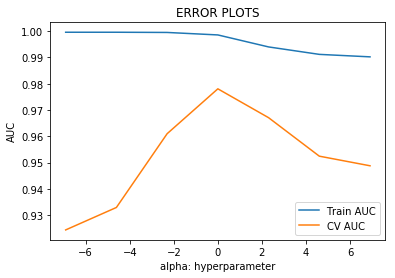

In [13]:
alph = [10**(-3),10**(-2),10**(-1),1,10,100,1000]
BOW_Train_Accuracy = []
BOW_CV_Accuracy = []
for i in alph:
    model = MultinomialNB(alpha=i)
    model.fit(BOW_Train,y_tr)
    train_pred = model.predict_log_proba(BOW_Train)[:,1]
    val_pred=model.predict_log_proba(BOW_CV)[:,1]
    BOW_Train_Accuracy.append(roc_auc_score(np.asarray(y_tr),np.asarray(train_pred)))
    BOW_CV_Accuracy.append(roc_auc_score(np.asarray(y_cv),np.asarray(val_pred)))

    
plt.plot(np.log(np.asarray(alph)), BOW_Train_Accuracy, label='Train AUC')
plt.plot(np.log(np.asarray(alph)), BOW_CV_Accuracy, label='CV AUC')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [14]:
best_alpha = 1

### Testing on test data

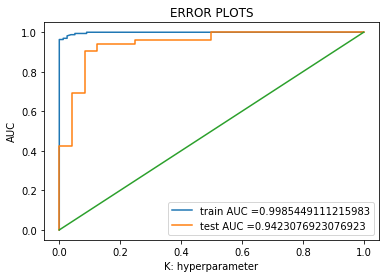

In [15]:
model = MultinomialNB(alpha=best_alpha)
model.fit(BOW_Train,y_tr)
test_pred = model.predict_log_proba(BOW_test)[:,1]
train_pred =model.predict_log_proba(BOW_Train)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(y_tr, train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


### Confusion Matrix

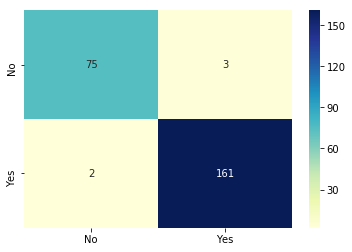

In [16]:
ytrain = model.predict(BOW_Train)
ytest = model.predict(BOW_test)
ctrain = confusion_matrix(y_tr,ytrain)
ctest = confusion_matrix(y_test,ytest)
class_label=["No","Yes"]
df = pd.DataFrame(ctrain, index=class_label, columns=class_label)
sns.heatmap(df, annot= True, fmt="d", cmap="YlGnBu")


# Logistic regression using l2 regularizer

# BOW

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

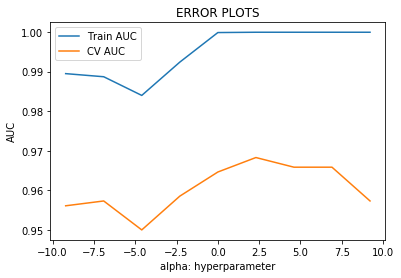

In [17]:
lamda= [10**(-4),10**(-3),10**(-2),10**(-1),1,10,100,1000,10000]
BOW_val_accuracy = []
BOW_train_accuracy = []
for i in lamda:
    model = LogisticRegression(C=i,penalty='l2')
    model.fit(BOW_Train,y_tr)
    val_data  = model.predict_log_proba(BOW_CV)[:,1]
    train_data = model.predict_log_proba(BOW_Train)[:,1]
    BOW_val_accuracy.append(roc_auc_score(np.asarray(y_cv),np.asarray(val_data)))
    BOW_train_accuracy.append(roc_auc_score(np.asarray(y_tr),np.asarray(train_data)))
plt.plot(np.log(np.asarray(lamda)), BOW_train_accuracy, label='Train AUC')
plt.plot(np.log(np.asarray(lamda)), BOW_val_accuracy, label='CV AUC')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()
    

In [24]:
best_lambda=10**-2

### Testing on test data

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


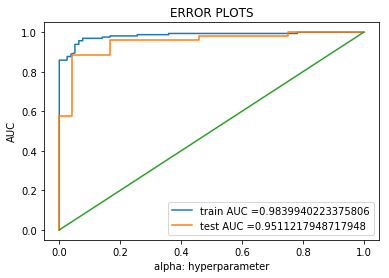

In [25]:
model = LogisticRegression(C=best_lambda,penalty='l2')
model.fit(BOW_Train,y_tr)
test_pred  = model.predict_log_proba(BOW_test)[:,1]
train_pred = model.predict_log_proba(BOW_Train)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(y_tr, train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


### Positive features

In [43]:
print(a)

[[ 5.11632807e-04  1.66502541e-03 -4.81708537e-04 -4.75343797e-04
  -4.79891132e-04 -2.89723177e-03 -9.55576993e-04  2.03844368e-03
   5.05866569e-04 -4.90549672e-04 -4.71808547e-04 -1.34785703e-03
   3.49675978e-05 -4.85096833e-04 -4.85572742e-04 -4.74711421e-04
   5.19031766e-04 -4.72071391e-04 -9.40823935e-04 -4.72828880e-04
  -9.06156582e-04  3.11710677e-05 -4.88320436e-04  5.16770704e-04
  -4.80427435e-04 -4.82377828e-04 -4.40210933e-04  5.15491165e-04
  -4.72828880e-04 -4.72828880e-04  1.02466557e-03 -1.41544375e-03
  -4.86485047e-04 -4.75052752e-04 -1.43706776e-03 -4.86485047e-04
   2.73678928e-05  6.12572798e-05 -4.68752544e-04 -9.62074171e-04
  -4.71808547e-04 -4.81708537e-04 -4.72973064e-04  5.13463913e-04
  -1.92693326e-03 -4.90525234e-04 -4.67710744e-04 -4.72548640e-04
  -2.13226057e-02 -4.86740533e-04 -9.69232459e-04 -9.47300443e-04
   5.15491165e-04 -4.79792553e-04  5.19031766e-04  5.11604705e-04
  -4.85572742e-04 -9.37709337e-04 -4.87864587e-04 -4.87181161e-04
  -4.91136

In [26]:
a = model.coef_
b= []
for i in range(611):
    if a[0][i]>0:
        b.append((i,a[0][i]))
b =  sorted(b,key= lambda x: x[1],reverse=True)
b=b[0:50]
print(b)
print(" So the top 50 features of positive class are--")
for i in range(0,50):
    print("feature name : %s , value : %f"%(count_vect.get_feature_names()[b[i][0]],b[i][1]))

[(143, 0.16852146429076045), (212, 0.14389328329271717), (567, 0.09889412009207728), (300, 0.07754270724343379), (232, 0.057942889576456685), (208, 0.04060087663457416), (281, 0.033994925084456895), (42, 0.033444299860637704), (598, 0.02936578549586982), (44, 0.02246641896593322), (160, 0.021587239959621016), (164, 0.02067816291233622), (568, 0.020413878887554113), (142, 0.020128486774632106), (504, 0.019902245148430652), (100, 0.017309208691967327), (80, 0.01710666544602056), (219, 0.0165073917096762), (476, 0.01636335809451611), (310, 0.01624361390541112), (222, 0.01597424303917039), (45, 0.0159377322701131), (539, 0.015615526730553976), (57, 0.015383087469001884), (316, 0.015052089793209777), (180, 0.014846248856174847), (309, 0.013538216138441314), (259, 0.013040513128997486), (261, 0.013011826657833748), (118, 0.012501188759881028), (405, 0.01223905113460106), (589, 0.012116228093740947), (263, 0.011728250049613245), (173, 0.011717542399802891), (244, 0.011716487483271401), (330, 

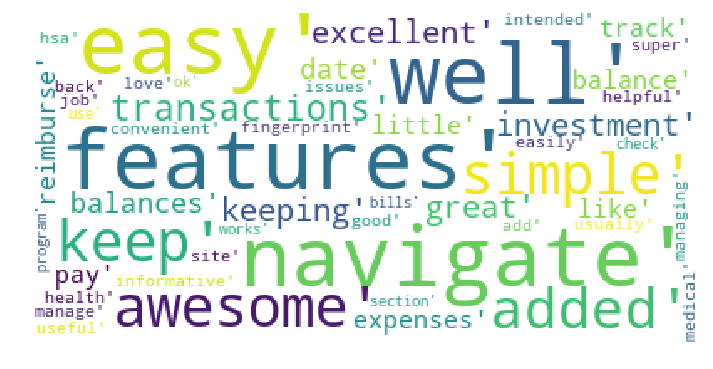

In [27]:
c=[]
for i in range(0,50):
    c.append(count_vect.get_feature_names()[b[i][0]])
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=50,
                          max_font_size=50, 
                          random_state=50
                         ).generate(str(c))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Negative features

In [28]:
a = model.coef_
b= []
for i in range(611):
    if a[0][i]<0:
        b.append((i,a[0][i]))
b =  sorted(b,key= lambda x: x[1])
b = b[0:100]
print(b)
print(" So the top 100 features of negative class are--")
for i in range(0,100):
    print("feature name : %s , value : %f"%(count_vect.get_feature_names()[b[i][0]],b[i][1]))

[(288, -0.10523629487231537), (344, -0.08023906689039927), (29, -0.0660627932248295), (560, -0.057003724131026064), (569, -0.04960959971410279), (529, -0.047732456228305), (367, -0.045423727856852794), (587, -0.039499390990248205), (279, -0.0387323114584013), (200, -0.03347350227082439), (478, -0.032317987326967175), (595, -0.03126402749983241), (59, -0.030910638909106655), (342, -0.03088730186971271), (264, -0.029515648861714195), (431, -0.029311038692490632), (553, -0.028961249640351693), (456, -0.028536296113344455), (243, -0.026092574996554322), (47, -0.025956259585825), (25, -0.02529489394886882), (138, -0.024886548042903876), (272, -0.024176124581733825), (518, -0.02407324720003935), (178, -0.02387579573059774), (193, -0.023149643705614797), (291, -0.02252583983491948), (446, -0.022325895683596608), (6, -0.02110265526964672), (530, -0.020582941810948812), (381, -0.020359245792428517), (545, -0.020263296037047806), (458, -0.02023921146481699), (91, -0.019842362472031437), (355, -0

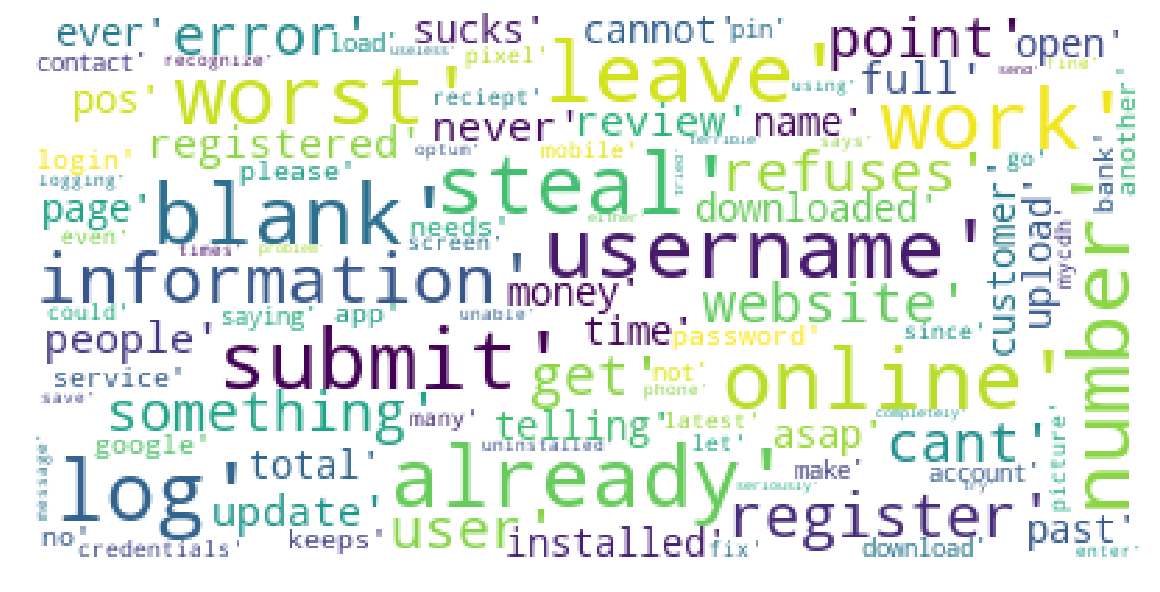

In [29]:
c=[]
for i in range(0,100):
    c.append(count_vect.get_feature_names()[b[i][0]])
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=30, 
                          random_state=50
                         ).generate(str(c))

fig = plt.figure(1,figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Tfidf

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

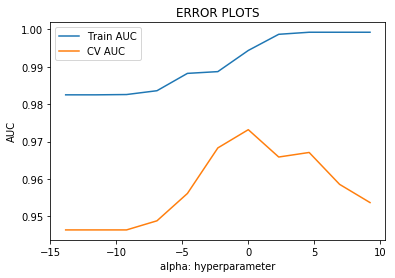

In [30]:
lamda= [10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,10,100,1000,10000]
tfidf_val_accuracy = []
tfidf_train_accuracy = []
for i in lamda:
    model = LogisticRegression(C=i,penalty='l2')
    model.fit(TFIDF_Train,y_tr)
    val_data  = model.predict_log_proba(TFIDF_Validation)[:,1]
    train_data = model.predict_log_proba(TFIDF_Train)[:,1]
    tfidf_val_accuracy.append(roc_auc_score(np.asarray(y_cv),np.asarray(val_data)))
    tfidf_train_accuracy.append(roc_auc_score(np.asarray(y_tr),np.asarray(train_data)))
plt.plot(np.log(np.asarray(lamda)), tfidf_train_accuracy, label='Train AUC')
plt.plot(np.log(np.asarray(lamda)), tfidf_val_accuracy, label='CV AUC')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [35]:
best_lambda =1

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


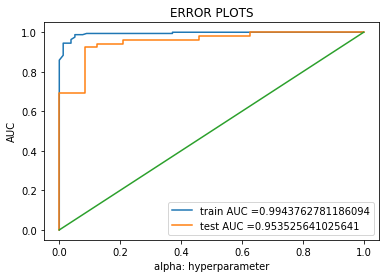

In [36]:
model = LogisticRegression(C=best_lambda,penalty='l2')
model.fit(TFIDF_Train,y_tr)
test_pred  = model.predict_log_proba(TFIDF_Test)[:,1]
train_pred = model.predict_log_proba(TFIDF_Train)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(y_tr, train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


### confusion Matrix

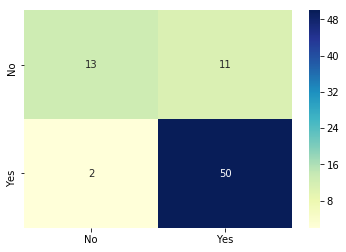

In [37]:
ytrain = model.predict(TFIDF_Train)
ytest = model.predict(TFIDF_Test)
ctrain = confusion_matrix(y_tr,ytrain)
ctest = confusion_matrix(y_test,ytest)
class_label=["No","Yes"]
df = pd.DataFrame(ctest, index=class_label, columns=class_label)
sns.heatmap(df, annot= True, fmt="d", cmap="YlGnBu")


### Positive features

In [91]:
a

array([[ 3.77784319e-06, -1.14629457e-05,  7.65290080e-06,
        -5.49881873e-06, -1.98569431e-06,  1.89335341e-07,
        -5.84365376e-06, -4.64490479e-06, -4.56019465e-07,
        -7.80998073e-06, -3.70468908e-05, -4.25096766e-06,
        -8.46765793e-06, -1.38008658e-05, -7.68643628e-06,
        -2.03417506e-06, -6.82980724e-06, -3.00678133e-06,
        -5.29999223e-06, -1.13685776e-06, -1.30501842e-06,
        -1.19478927e-07, -3.95015070e-06, -3.88611026e-06,
        -2.38565815e-06, -6.44503094e-06, -4.63185688e-06,
        -4.34498776e-06, -5.96529263e-06,  1.68429684e-06,
        -2.21992163e-06, -4.51618619e-06, -4.46822395e-06,
        -4.00171533e-06, -2.23141000e-06, -1.13390494e-05,
        -5.85448551e-06, -1.06817647e-06, -1.22387176e-06,
        -1.85761784e-06, -7.25765346e-06, -6.53566939e-06,
        -4.50213212e-06, -3.22717861e-06, -3.51498133e-06,
        -1.04323966e-05,  7.02589196e-06,  2.24271816e-05,
         1.49197913e-05,  1.18504034e-06, -8.01574566e-0

In [39]:
# Please write all the code with proper documentation
a = model.coef_
b= []
for i in range(177):
    if a[0][i]>0:
        b.append((i,a[0][i]))
b =  sorted(b,key= lambda x: x[1],reverse=True)
b=b[0:50]
print(b)
print(" So the top 50 features of positive class are--")
for i in range(0,50):
    print("feature name : %s , value : %f"%(tf_idf_vect.get_feature_names()[b[i][0]],b[i][1]))

[(62, 1.84474226750634), (35, 1.6903589993017645), (88, 1.5285905569021019), (60, 1.0616220955118933), (13, 0.9935839336046104), (68, 0.9751967098546069), (39, 0.956353705639245), (157, 0.9146644084611673), (63, 0.8879475999430629), (44, 0.8787340136336077), (84, 0.8400601031467144), (172, 0.7264843155123102), (158, 0.6377019467561763), (26, 0.5990808784947533), (30, 0.5401125464534554), (138, 0.5110916845079233), (74, 0.48607867045753894), (15, 0.470227815294072), (75, 0.4647969997469856), (45, 0.4605587498067917), (140, 0.4597039579246131), (169, 0.43365158032084145), (34, 0.4320263511805412), (67, 0.43197503920293334), (89, 0.3962939373766006), (16, 0.38519411046419694), (72, 0.37520004211803404), (65, 0.3748916364252821), (176, 0.32954591200890093), (174, 0.32893587991184686), (122, 0.3261044973381255), (93, 0.3133778864515052), (20, 0.31236054524022266), (147, 0.30945461442442085), (47, 0.3061386225334672), (61, 0.2962970528575239), (50, 0.29486564386650216), (77, 0.28099568305654

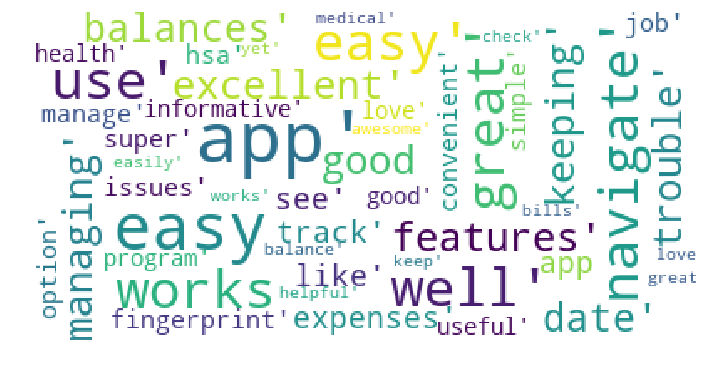

In [40]:
c=[]
for i in range(0,50):
    c.append(tf_idf_vect.get_feature_names()[b[i][0]])
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=50,
                          max_font_size=43, 
                          random_state=50
                         ).generate(str(c))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Negative features

In [94]:
len(b)

189

In [42]:
a = model.coef_
b= []
for i in range(177):
    if a[0][i]<0:
        b.append((i,a[0][i]))
b =  sorted(b,key= lambda x: x[1])
b=b[0:100]
print(b)
print(" So the top 100 features of positive class are--")
for i in range(0,100):
    print("feature name : %s , value : %f"%(tf_idf_vect.get_feature_names()[b[i][0]],b[i][1]))

[(85, -1.722099561356316), (105, -1.6872073730774102), (154, -1.1702055045608708), (159, -1.1652629436758497), (21, -0.9609469453447335), (145, -0.8852524240854964), (104, -0.7725681241986573), (5, -0.7489840809957413), (168, -0.7353400830306506), (33, -0.7268412070136965), (82, -0.7070775652965418), (152, -0.6919853162374666), (55, -0.666987618953709), (127, -0.664269637836689), (115, -0.6464836864942586), (143, -0.6090855214083131), (139, -0.6052966397336579), (83, -0.6010315385809338), (87, -0.5988797022985763), (25, -0.5958805606090161), (17, -0.5888928557388428), (2, -0.583021790215609), (170, -0.5656928437337183), (49, -0.5515429187647383), (131, -0.5474492873963523), (114, -0.5454859006599543), (142, -0.5410559052840811), (51, -0.526992014818068), (110, -0.523339110830234), (132, -0.5176708210212567), (80, -0.5056113970203061), (101, -0.4973854888264831), (119, -0.4890356278440611), (6, -0.4830983495762807), (125, -0.4679011586151379), (163, -0.4660462584064832), (71, -0.4610244

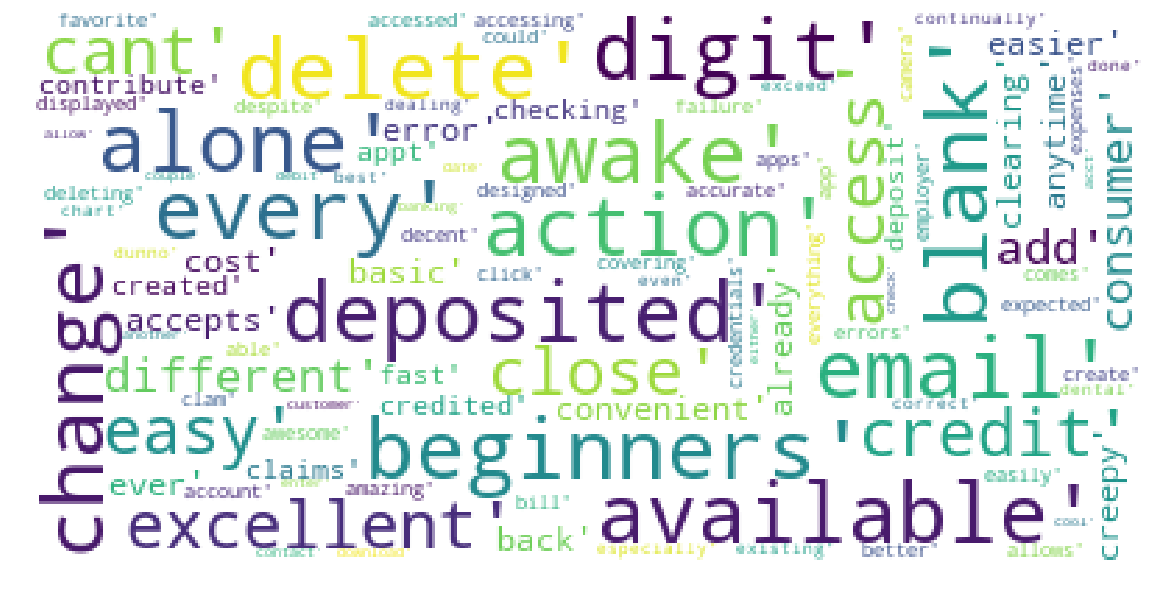

In [43]:
c=[]
for i in range(0,100):
    c.append(count_vect.get_feature_names()[b[i][0]])
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=30, 
                          random_state=50
                         ).generate(str(c))

fig = plt.figure(1,figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()